In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
covid_df = pd.read_csv('owid-covid-data.csv')

# Initial exploration
print(covid_df.info())
print(covid_df.head())
print(covid_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [2]:
# Convert date column to datetime
covid_df['date'] = pd.to_datetime(covid_df['date'])

# Select countries of interest
countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'Kenya', 'South Africa']
filtered_df = covid_df[covid_df['location'].isin(countries)]

# Handle missing values - fill forward for time series data
cleaned_df = filtered_df.groupby('location').apply(lambda group: group.ffill())

C:\Users\USER\AppData\Local\Temp\ipykernel_6816\3498106078.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cleaned_df = filtered_df.groupby('location').apply(lambda group: group.ffill())


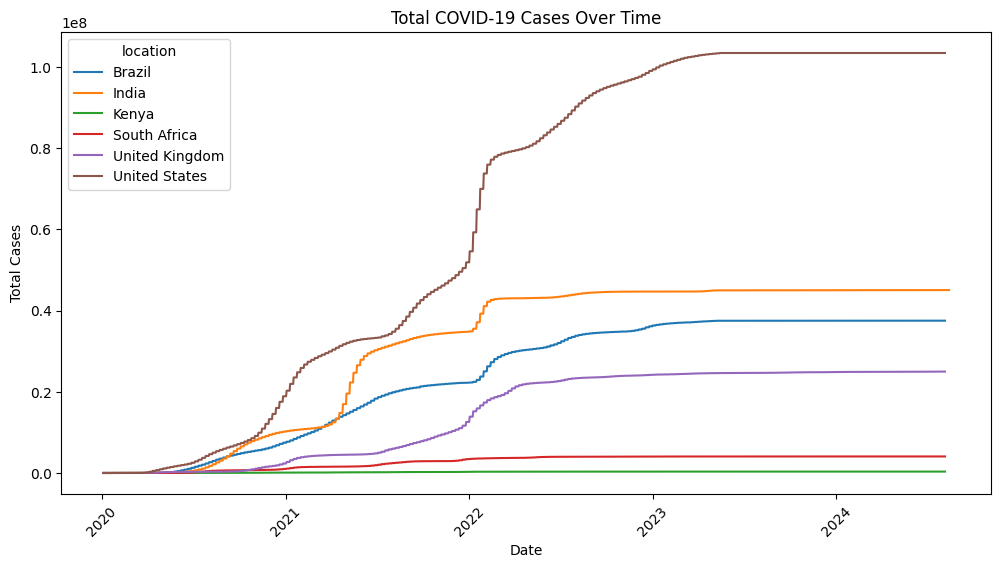

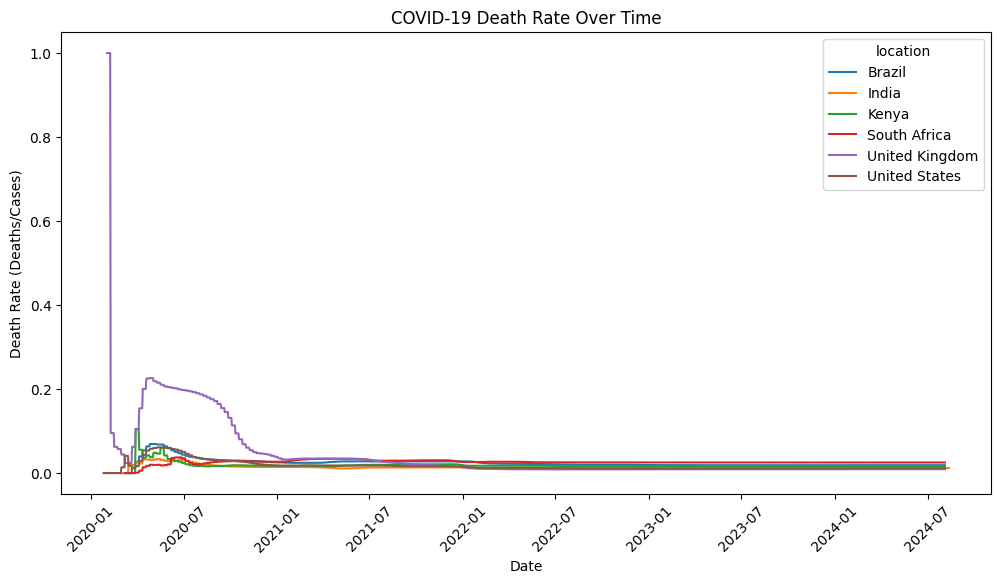

In [3]:
# Plot total cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=cleaned_df, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.ylabel('Total Cases')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

# Calculate and plot death rates
cleaned_df['death_rate'] = cleaned_df['total_deaths'] / cleaned_df['total_cases']

plt.figure(figsize=(12, 6))
sns.lineplot(data=cleaned_df, x='date', y='death_rate', hue='location')
plt.title('COVID-19 Death Rate Over Time')
plt.ylabel('Death Rate (Deaths/Cases)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

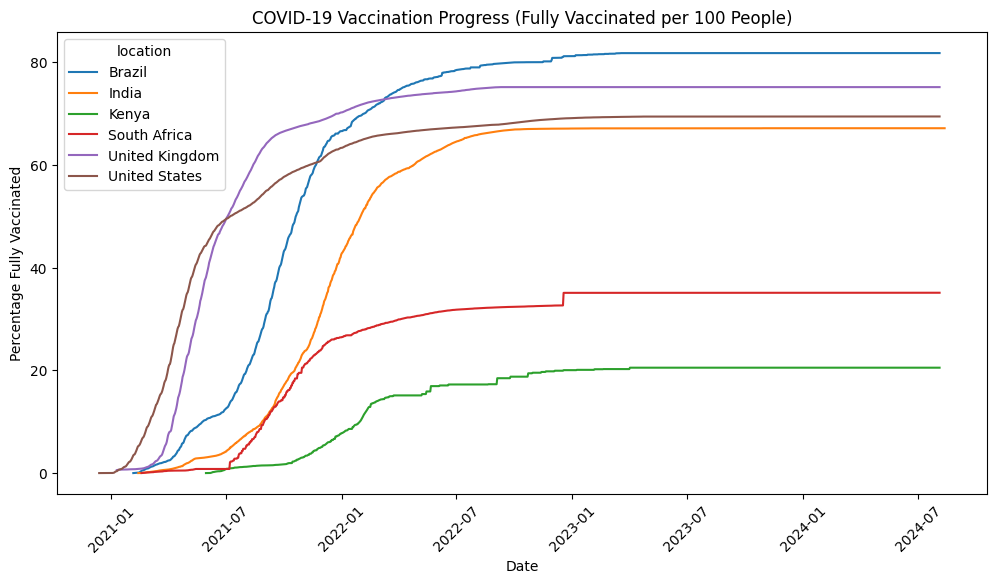

In [4]:
# Plot vaccination progress
plt.figure(figsize=(12, 6))
sns.lineplot(data=cleaned_df, x='date', y='people_fully_vaccinated_per_hundred', hue='location')
plt.title('COVID-19 Vaccination Progress (Fully Vaccinated per 100 People)')
plt.ylabel('Percentage Fully Vaccinated')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

In [5]:
import plotly.express as px

# Get latest data for each country
latest_data = covid_df.sort_values('date').groupby('location').last().reset_index()

# Create choropleth
fig = px.choropleth(latest_data, 
                    locations="iso_code",
                    color="total_cases_per_million",
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Total COVID-19 Cases per Million People")
fig.show()

## Key Insights

1. **Vaccination Disparities**: Developed nations like the US and UK showed rapid vaccination rollout compared to developing countries like Kenya.

2. **Case Trends**: Brazil experienced significant waves of infections, while India had a dramatic spike in mid-2021.

3. **Death Rates**: Countries with robust healthcare systems generally maintained lower death rates despite high case numbers.

4. **Regional Patterns**: African nations generally reported lower case numbers but this may reflect differences in testing capacity.

5. **Vaccination Impact**: Countries with early vaccination campaigns saw slower subsequent case growth.